In [1]:
import matplotlib.pyplot as plt
import numpy as np
#rom sklearn.linear_model import LinearRegression
import seaborn as sns; sns.set()

# Read in data (using Numpy)
yearsBase, meanBase = np.loadtxt('./data/5-year-mean-1951-1980.csv', delimiter=',', unpack=True)
years, mean = np.loadtxt('./data/5-year-mean-1882-2014.csv', delimiter=',', unpack=True)

RMSE: [0.06169611]
Coefficients: [ 7.27919911e-03 -1.43092659e+01]
R2 score: 0.5104925301851928


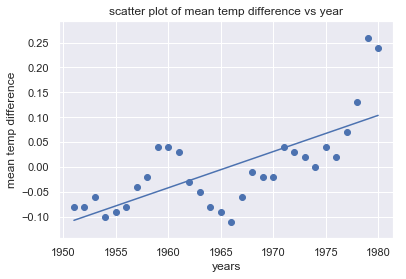

 y = 0.00727919911012223 * x + -14.309265850945241


In [2]:
# Creates a linear (1st order polynomial) regression using NumPy
#m,b 
z, residuals, rank, singular_values, rcond = np.polyfit(yearsBase, meanBase, 1, full=True)  # last argument is the degree of the polynomial to use
print('RMSE:', np.sqrt(residuals/yearsBase.size)) # residuals is the sum of the squares of the fit errors
print('Coefficients:',z)        # above line is the RMSE - root mean square error
m = z[0]                        # this is the average of the fit error
b = z[1]

# This is a simple y = mx + b line function
def f(x):
    return m*x + b

correlation_matrix = np.corrcoef(meanBase, f(yearsBase))
correlation_yyhat = correlation_matrix[0, 1]
r_squared = correlation_yyhat**2
print('R2 score:', r_squared) # This is the coefficient of determination.

# This generates the same scatter plot as before, but adds a line plot using the function above
plt.scatter(yearsBase, meanBase)
plt.plot(yearsBase, f(yearsBase))
plt.title('scatter plot of mean temp difference vs year')
plt.xlabel('years', fontsize=12)
plt.ylabel('mean temp difference', fontsize=12)
plt.show()

# Prints text to the screen showing the computed values of m and b
print(' y = {0} * x + {1}'.format(m, b))
plt.show()

RMSE: [0.05158497]
Coefficients: [ 5.05919275e-04 -1.98148947e+00  1.94011524e+03]
R2 score: 0.6577920722986391


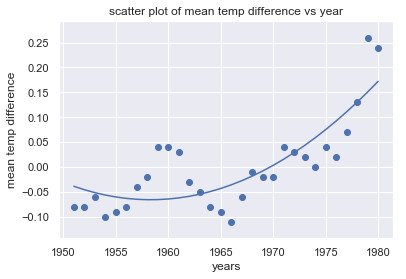

 y = 0.0005059192753881479 * x**2 + -1.9814894724406988 * x + 1940.1152443299225


In [3]:
# Creates a linear (2nd order polynomial) regression using NumPy
#c,m,b 
z, residuals, rank, singular_values, rcond = np.polyfit(yearsBase, meanBase, 2, full=True)  # 2nd degree polynomial
c = z[0]
m = z[1]
b = z[2]

print('RMSE:', np.sqrt(residuals/yearsBase.size)) # residuals is the sum of the squares of the fit errors
print('Coefficients:',z)        # above line is the RMSE - root mean square error

# This is a simple y = cx**2 + mx + b line function
def f2(x):
    return c*(x**2) + m*x + b

correlation_matrix = np.corrcoef(meanBase, f2(yearsBase))
correlation_yyhat = correlation_matrix[0, 1]
r_squared = correlation_yyhat**2
print('R2 score:', r_squared)   # This is the coefficient of determination.

# This generates the same scatter plot as before, but adds a line plot using the function above
plt.scatter(yearsBase, meanBase)
plt.plot(yearsBase, f2(yearsBase))
plt.title('scatter plot of mean temp difference vs year')
plt.xlabel('years', fontsize=12)
plt.ylabel('mean temp difference', fontsize=12)
plt.show()

# Prints text to the screen showing the computed values of m and b
print(' y = {0} * x**2 + {1} * x + {2}'.format(c, m, b))
plt.show()